In [3]:
import os
import sys
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
import legume 
legume.set_backend('autograd')
import legume.backend as bd
import numpy as np
import autograd.numpy as npa
from autograd import grad
import time
import matplotlib.pyplot as plt
import optomization
import json

In [4]:
optomization.runBatchReport(28,0,8,'media/ng28_tests','media/ng28_tests/report.html')

In [2]:
a = 420
phc = optomization.W1(NyChange=0,Ny=7, ra=.25 ,eps_slab=3.13,dslab=270/a)
gme = legume.GuidedModeExp(phc,2.01)
ks = npa.linspace(np.pi*.5,np.pi,100)
gmeParams = {'verbose':False,'numeig':21,'compute_im':False,'kpoints':npa.array([ks,[0]*len(ks)])}
gme.run(**gmeParams)

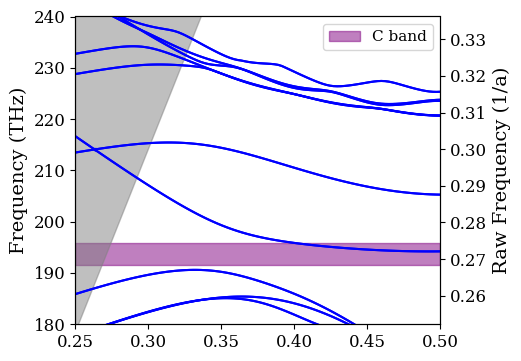

In [732]:
fconv = 299792458/a/1e-9/1e12
c_band_max = 195.9
c_band_min = 191.56

fig, ax1 = plt.subplots(figsize=(5.4, 3.8))

# Plot with frequency conversion on the left axis
ax1.plot(ks/np.pi/2, gme.freqs*fconv, color='b')
ax1.fill_between(ks/np.pi/2, c_band_min, c_band_max, color='purple', alpha=.5,label='C band')
ax1.fill_between(ks/np.pi/2, ks*fconv/np.pi/2, np.max(ks)*fconv/np.pi/2, color='gray', alpha=.5)
ax1.set_ylim(180, 240)
ax1.set_xlim(.25, 0.5)
ax1.set_ylabel('Frequency (THz)')

# Create a second y-axis without frequency conversion
ax2 = ax1.twinx()
ax2.plot(ks/np.pi/2, gme.freqs, color='b')
ax2.set_ylabel('Raw Frequency (1/a)')
# Match x-limits
ax2.set_ylim(ax1.get_ylim()[0]/fconv, ax1.get_ylim()[1]/fconv)
ax1.legend()
fig.tight_layout()
plt.show()

In [5]:
ks = npa.linspace(np.pi*.5,np.pi,25)

In [7]:
k = ks/np.pi/2
print(k[3],k[6],k[16],k[24])

0.28125 0.3125 0.41666666666666663 0.5


In [8]:
ks = np.linspace(np.pi*.5,np.pi,150)
np.argmin(np.abs(ks-2.094395))

50